# SSRI Time Domain Behavior Visualization
*Code by Nabeel Sherazi*

*Reach me by email! hey@nabeelsherazi.com*

**How to use:**
For the first run, click the "play" button in the top right corner of the cell below to start the code. Once it's started, you can change any setting and the code will automatically re-run. A plot will be generated right under the form. The code for the simulation is also copied in the cell under the form.

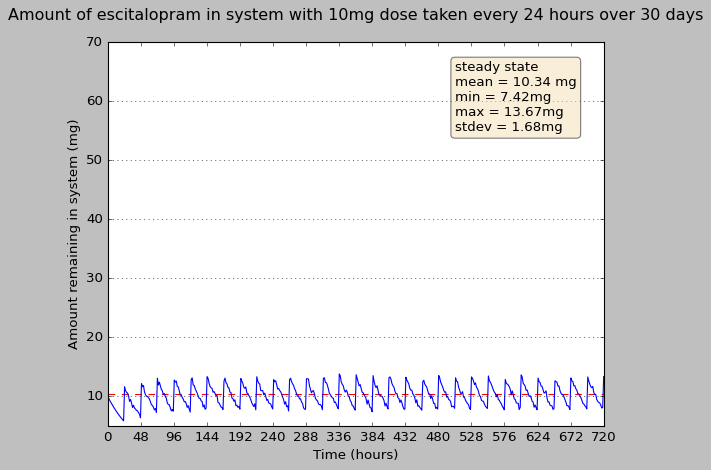

In [ ]:
#@title Behavior settings {run: "auto"}
#@markdown Adjust the settings as desired to modify the plots below

#@markdown *Medication name*
name = "escitalopram"  #@param {type: "string"}

#@markdown *Half-life of medication (hours)*
half_life = 30  #@param {type: "number"}

#@markdown *Dosage (mg)*
dose =     10#@param {type: "number"}

#@markdown *Dosage interval (hours)*
interval = 24  #@param {type: "number"}

#@markdown *Days to graph (days)*
total_days = 30  #@param {type: "number"}

#@markdown <hover>*Account for loss for pill splitting (if required by dosage)*</hover>

#@markdown <small>Some amount of medication is lost to oxidation and erosion
#@markdown if pills need to be cut for the required dosage. Check this to account for that loss.</small>
pill_split_loss = False  #@param {type: "boolean"}

#@markdown *Add error into actual time of each dose (hours)*

#@markdown <small>In practice, most people take their medicines within some bell-curve
#@markdown of the <i>exact time</i> they were supposed to take it. Set this value to
#@markdown non-zero to add randomness to the actual time of each dose, using a Gaussian distribution
#@markdown of stdev `dose_interval_error`</small>
dose_interval_error =   2#@param {type: "number"}

#@markdown ---

from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

def amount_remaining(dose, interval, half_life, global_time, pill_split_loss, dose_interval_error):
    """
    Equation for how much of a medication with half life `half_life`
    is in your system `global_time` hours after
    first dose, taking `dose` every `interval` hours.
    """
    if pill_split_loss:
        dose = 0.9 * dose # Assume 10% loss
    tau = half_life / np.log(2)
    amount = dose * np.exp(-global_time / tau)
    num_doses_to_be_added = global_time // interval
    num_doses_added = 0
    while num_doses_added != num_doses_to_be_added:
        relative_time = global_time - (interval * num_doses_added) + np.random.normal(0, dose_interval_error)
        amount += dose * np.exp(-relative_time / tau)
        num_doses_added +=1
    return amount


# Generate behavior data points
t = np.linspace(0, total_days * 24, 500)
a = np.vectorize(amount_remaining)(dose, interval, half_life, t, pill_split_loss, dose_interval_error)

# Plot stuff
plt.style.use('classic')
fig, ax = plt.subplots()

plt.title(f"Amount of {name} in system with {dose}mg dose taken every {interval} hours over {total_days} days", pad=20)
plt.xlabel("Time (hours)")
plt.ylabel("Amount remaining in system (mg)")
plt.xticks(np.arange(min(t), max(t)+1, 48.0))
plt.ylim(5, 70)
plt.grid(True, axis='y')

# Calculating statistics from steady-state part only
# Use second half of data set (approximately 15 days and onward as steady state part)
steady_state = a[len(a) // 2 : ]
mean_val = round(np.mean(steady_state), 2)
mean_array = mean_val * np.ones(len(t)) # For plotting mean line
ss_min = round(min(steady_state), 2)
ss_max = round(max(steady_state), 2)
ss_stdev = round(np.std(steady_state, ddof=1), 2)
plt.plot(t, mean_array, "--r")

# Textbox for statistics
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

info = "\n".join(["steady state",
                    f"mean = {mean_val} mg",
                    f"min = {ss_min}mg",
                    f"max = {ss_max}mg",
                    f"stdev = {ss_stdev}mg"])

ax.text(0.7, 0.95, info, transform=ax.transAxes,
        verticalalignment='top', bbox=props)

plt.plot(t, a)

The code for the simulation part is copied below.

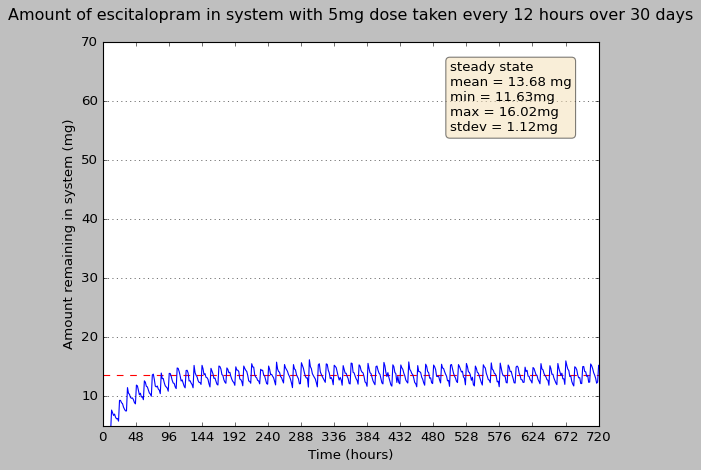

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

def amount_remaining(dose, interval, half_life, global_time, pill_split_loss, dose_interval_error):
    """
    Equation for how much of a medication with half life `half_life`
    is in your system `global_time` hours after
    first dose, taking `dose` every `interval` hours.
    """
    if pill_split_loss:
        dose = 0.9 * dose # Assume 10% loss
    tau = half_life / np.log(2)
    amount = dose * np.exp(-global_time / tau)
    num_doses_to_be_added = global_time // interval
    num_doses_added = 0
    while num_doses_added != num_doses_to_be_added:
        relative_time = global_time - (interval * num_doses_added) + np.random.normal(0, dose_interval_error)
        amount += dose * np.exp(-relative_time / tau)
        num_doses_added +=1
    return amount


# Generate behavior data points
t = np.linspace(0, total_days * 24, 500)
a = np.vectorize(amount_remaining)(dose, interval, half_life, t, pill_split_loss, dose_interval_error)

# Plot stuff
plt.style.use('classic')
fig, ax = plt.subplots()

plt.title(f"Amount of {name} in system with {dose}mg dose taken every {interval} hours over {total_days} days", pad=20)
plt.xlabel("Time (hours)")
plt.ylabel("Amount remaining in system (mg)")
plt.xticks(np.arange(min(t), max(t)+1, 48.0))
plt.ylim(5, 70)
plt.grid(True, axis='y')

# Calculating statistics from steady-state part only
# Use second half of data set (approximately 15 days and onward as steady state part)
steady_state = a[len(a) // 2 : ]
mean_val = round(np.mean(steady_state), 2)
mean_array = mean_val * np.ones(len(t)) # For plotting mean line
ss_min = round(min(steady_state), 2)
ss_max = round(max(steady_state), 2)
ss_stdev = round(np.std(steady_state, ddof=1), 2)
plt.plot(t, mean_array, "--r")

# Textbox for statistics
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

info = "\n".join(["steady state",
                    f"mean = {mean_val} mg",
                    f"min = {ss_min}mg",
                    f"max = {ss_max}mg",
                    f"stdev = {ss_stdev}mg"])

ax.text(0.7, 0.95, info, transform=ax.transAxes,
        verticalalignment='top', bbox=props)

plt.plot(t, a)